# Case study on Unsupervised Learning

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment.

In [2]:
## Load data from Wine.csv file to data set wine_data
wine_data=pd.read_csv("D:\python\DSACaseStudy\Wine.csv")
## Show first five rows in the wine data set
wine_data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Check the basic details of the wine dataset

In [3]:
## Display the shape - total number of rows and columns in the wine dataset
wine_data.shape

(178, 13)

Our wine dataset has 178 rows and 13 columns

In [4]:
## Display the columns header and data type specifications etc-This will give the information about the wine data set. ie. information about the wine DataFrame including the index dtype and column dtypes, non-null values and memory usage.
print("Summary of the basic information about wine DataFrame and its data:")
wine_data.info()

Summary of the basic information about wine DataFrame and its data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
## nunique() method will print the counts of unique numbers in each column
wine_data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [6]:
## Calculating the statistical data of the numerical values of the wine data set
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The describe() method is used to get a summary of numeric values in the wine dataset. It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values. It also counts the number of variables in the wine dataset.

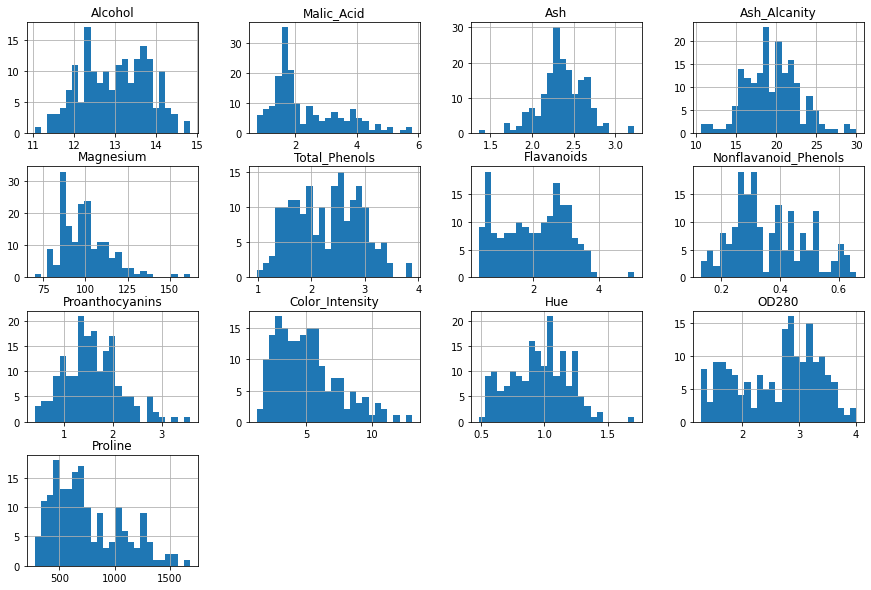

In [7]:
wine_data.hist(bins=25,figsize=(15,10))
# display histogram
plt.show()

The histogram visualization reveals that how that wine data is easily distributed on different features.

<AxesSubplot:>

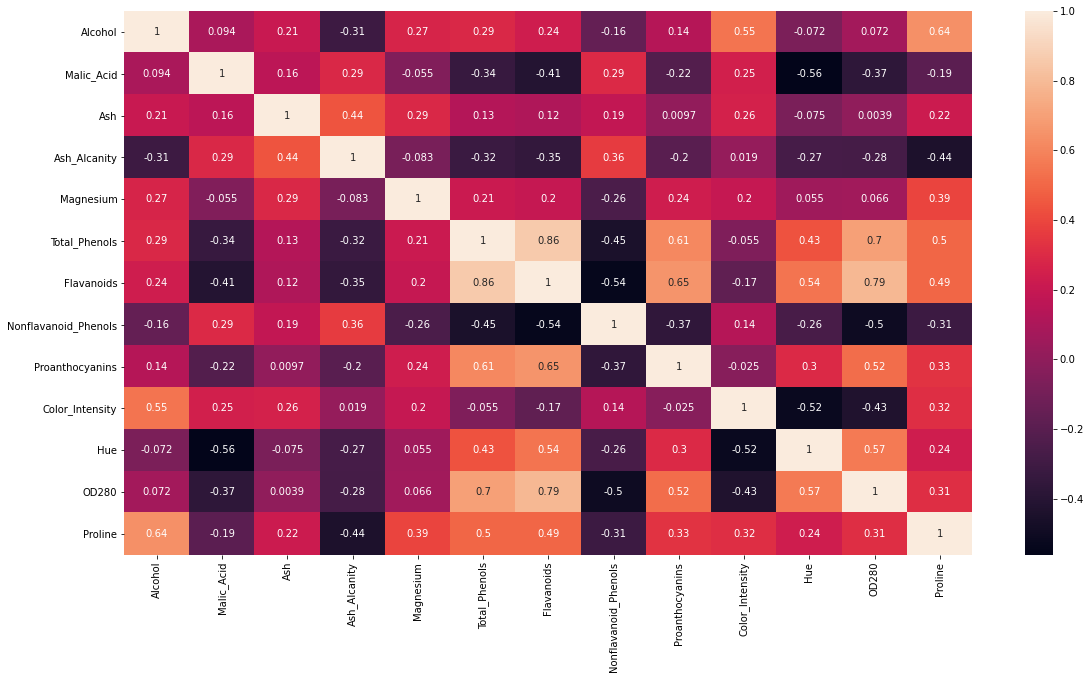

In [8]:
# ploting heatmap
plt.figure(figsize=[19,10])
sns.heatmap(wine_data.corr(),annot=True)

For checking correlation we use a statistical method that finds the bonding and relationship between two features.
We have to find those features that are fully correlated to each other by this we reduce the number of features from the wine data.
The relationship among those high correlated features are equal, they equally impact on model accuracy so, we delete one of them.
Here the features 'Flavanoids' and 'Total_Phenols' are highly correlated. So we have to delete one of them.

In [9]:
wine=wine_data.drop('Flavanoids',axis=1)

In [10]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735


##  Wine Data Pre-Processing 

In [11]:
## Check null values if any
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No Null values present in the wine dataset

## Outlier Analysis 

<AxesSubplot:>

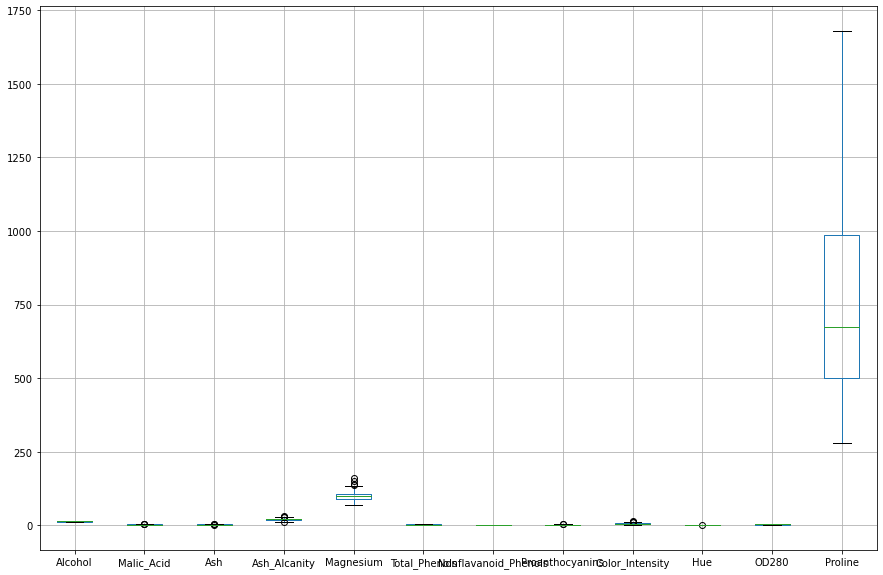

In [12]:
##outlier Analysis
wine.boxplot(figsize=[15,10])
## This will form a Box-plot for the skewed feature of specified columns

In the wine dataset the feature 'Magnesium' had some outliers

## Handling Outliers

In [13]:
Q1 = np.percentile(wine['Magnesium'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(wine['Magnesium'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)
lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)
print("Upper limit:",upper)
print("Lower limit:",lower)
index=wine['Magnesium'][(wine['Magnesium']>upper)|(wine['Magnesium']<lower)].index
wine.drop(index,inplace=True)

First Quantile: 88.0
Third Quantile: 107.0
IQR: 19.0
Upper limit: 135.5
Lower limit: 59.5


In [14]:
wine.shape

(174, 12)

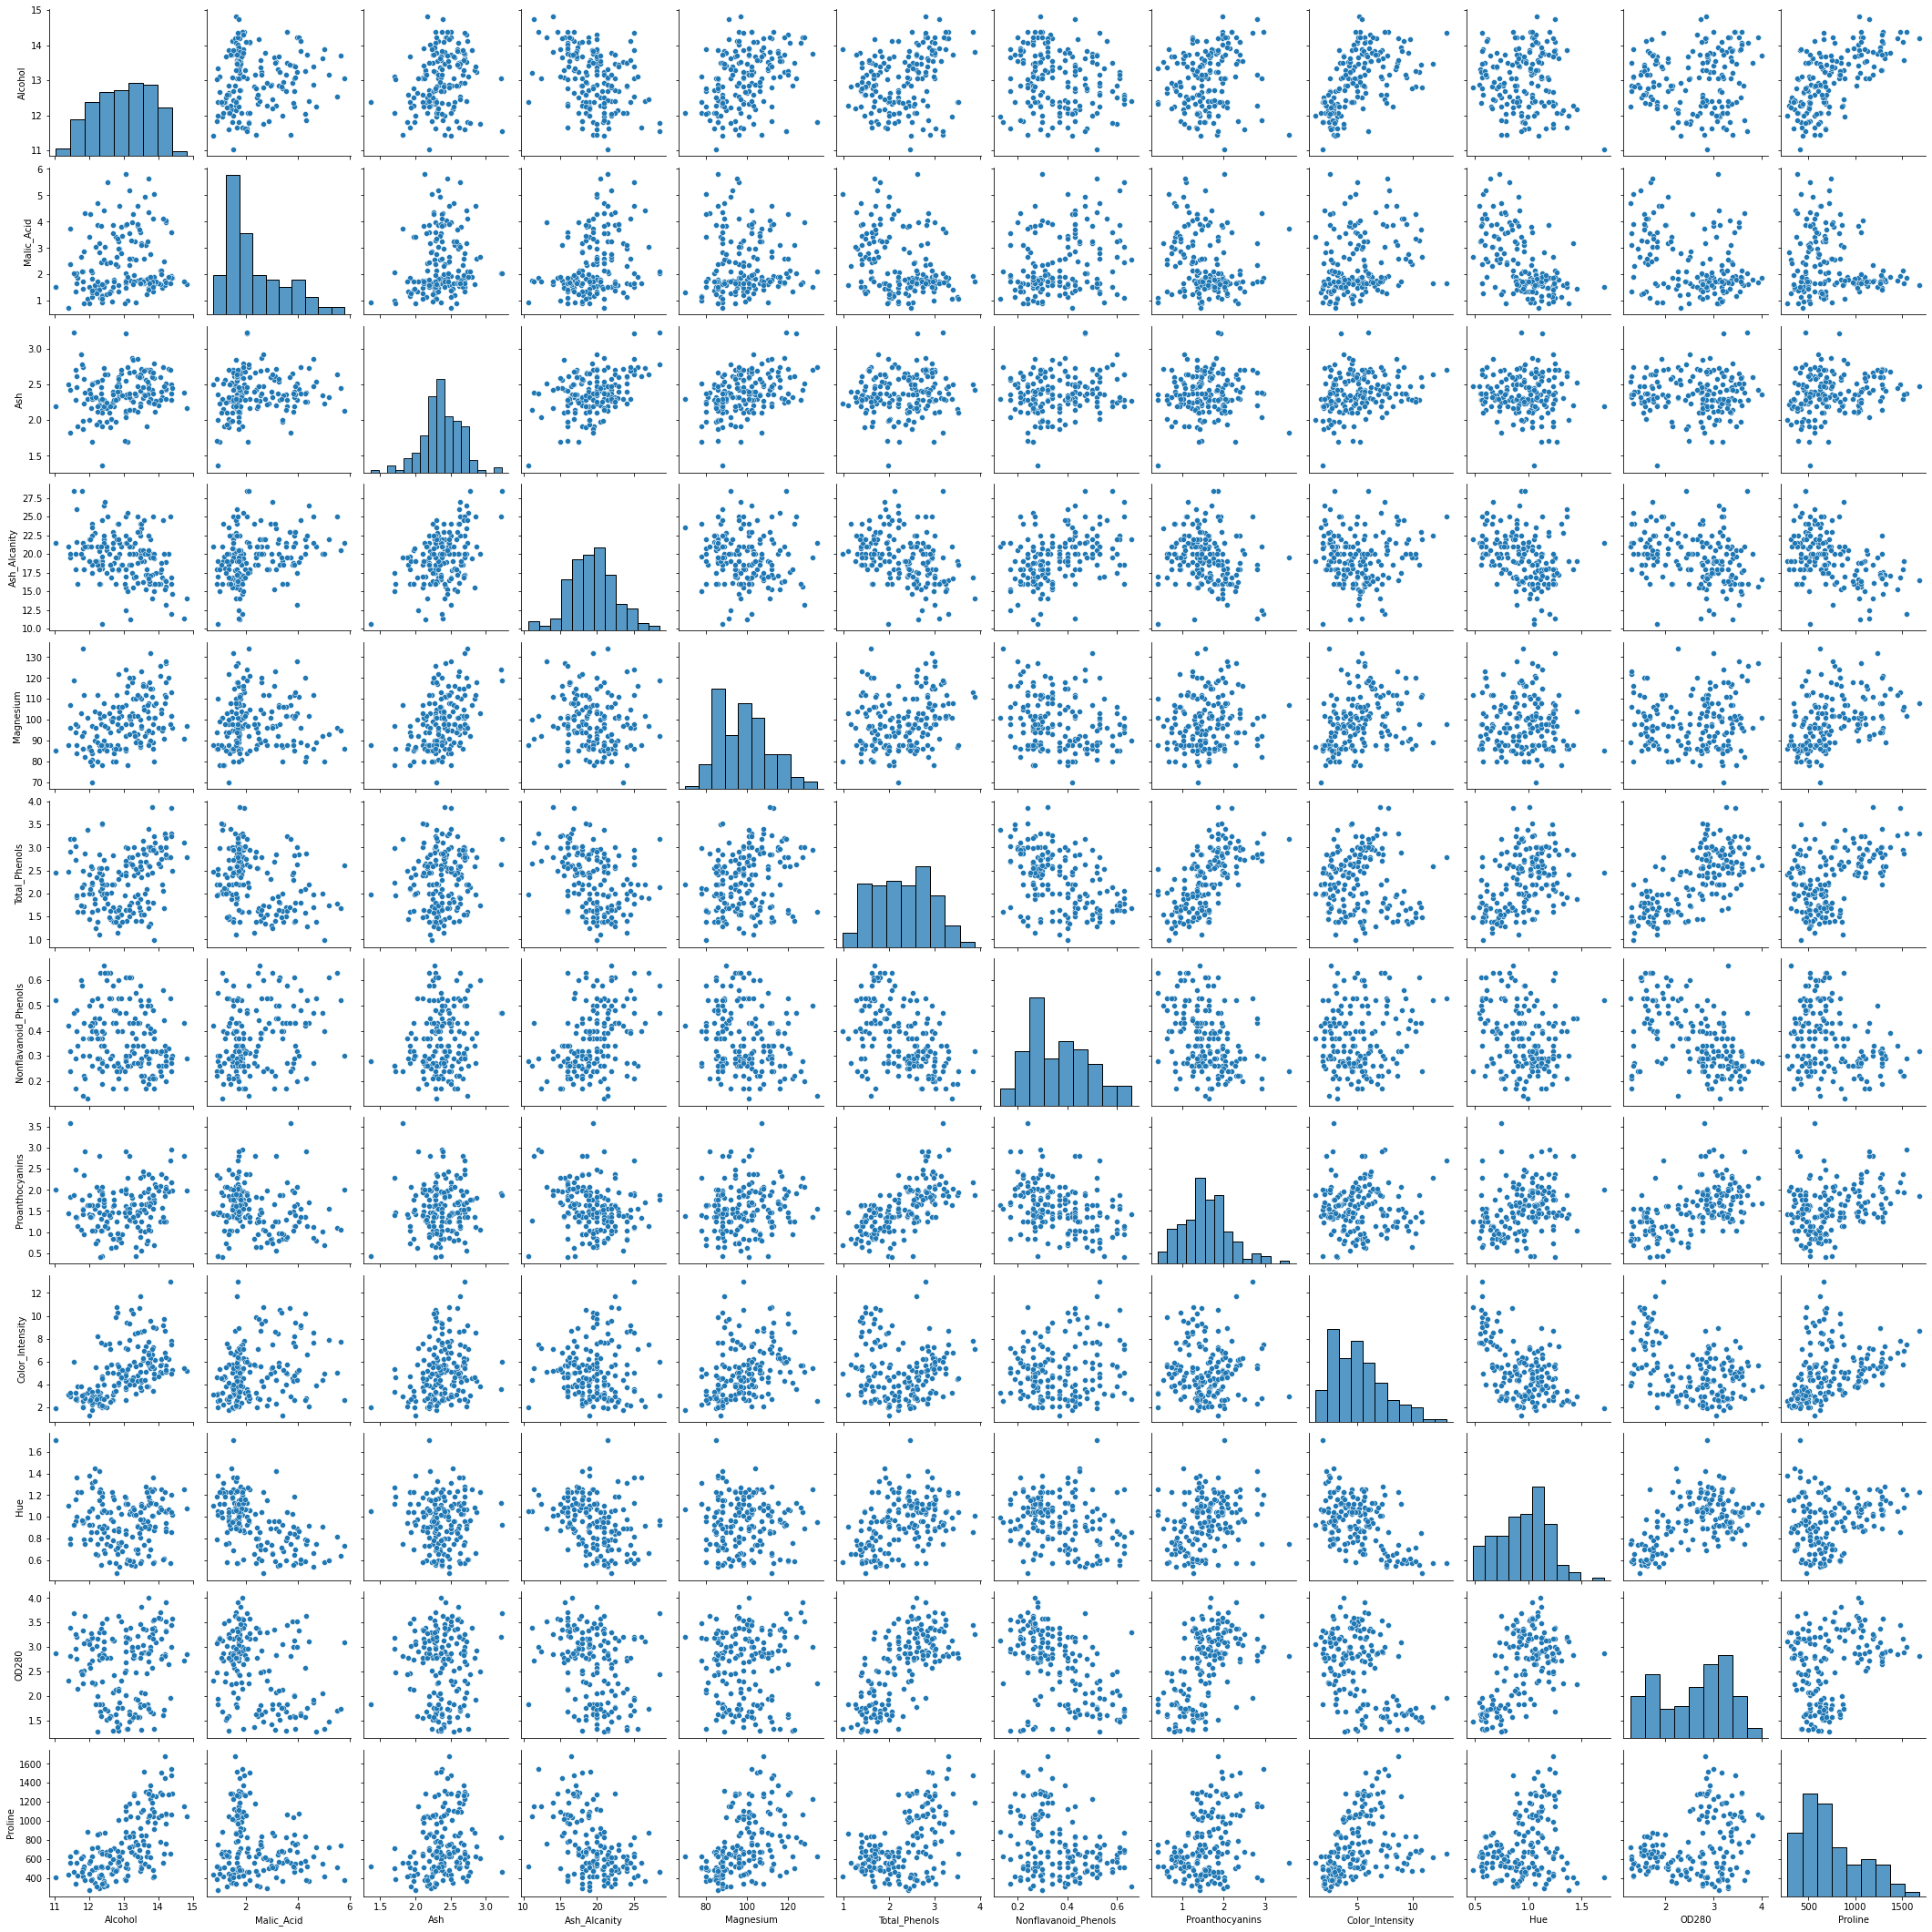

In [15]:
sns.pairplot(wine)

## 2. Clustering  Models

## a. K Means Clustering 

In [19]:
## kmeans clustering
from sklearn.cluster import KMeans
model_kmeans= KMeans(n_clusters =5)
model_kmeans.fit(wine)

KMeans(n_clusters=5)

In [20]:
labels=model_kmeans.predict(wine)
print(labels)

[4 4 4 0 2 0 0 0 4 4 0 0 0 4 0 0 0 4 0 2 2 2 4 4 2 2 4 0 2 4 0 0 4 0 4 2 2
 4 4 2 2 4 4 1 2 4 4 4 4 0 4 0 4 0 4 4 4 0 0 3 1 3 1 3 3 1 3 3 2 2 3 3 2 3
 3 3 3 3 1 1 3 3 3 3 1 1 1 3 3 3 3 3 1 3 1 3 1 1 3 3 1 3 3 3 3 1 1 3 1 3 3
 3 3 3 3 1 1 3 3 3 3 3 3 3 3 1 1 3 1 1 1 1 1 3 1 1 1 2 3 1 2 2 3 1 1 1 3 3
 3 1 1 1 3 2 1 1 3 1 1 1 1 3 1 1 2 1 3 3 1 2 2 2 2 1]


## b. Agglomerative Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(wine)

In [22]:
y_hc

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 4, 4, 0,
       2, 2, 0, 0, 4, 2, 0, 4, 4, 2, 2, 4, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 4, 4, 0, 4, 0, 4, 0, 2, 4, 4, 0, 4, 2, 2, 4, 0, 2, 4, 2, 4,
       4, 4, 2, 4, 4, 2, 0, 2, 4, 4, 4, 4, 4, 2, 4, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 4, 0, 0, 2, 2, 2, 4, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2],
      dtype=int64)

## c. PCA 

In [23]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(wine)
scaled_data = pd.DataFrame(scaled_data, columns = wine.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,-3.570579e-15,1.110223e-16,1.148507e-16,1.161268e-16,-5.897262e-16,-4.447273e-16,-1.110223e-16,5.519212e-16,4.211191e-17,1.531342e-16,-2.182162e-16,-1.486678e-16
std,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00
min,-2.435226e+00,-1.451356e+00,-3.748987e+00,-2.735098e+00,-2.320152e+00,-2.101501e+00,-1.892841e+00,-2.102501e+00,-1.650338e+00,-2.078959e+00,-1.876679e+00,-1.473008e+00
25%,-7.889119e-01,-6.715369e-01,-5.540453e-01,-7.022286e-01,-8.627281e-01,-9.090927e-01,-7.618722e-01,-5.898470e-01,-8.001940e-01,-7.570715e-01,-9.598206e-01,-7.721477e-01
50%,4.653119e-02,-4.340057e-01,-4.470682e-02,6.195614e-03,-9.353201e-02,9.925235e-02,-1.963875e-01,-4.928880e-02,-1.312989e-01,3.606067e-02,2.450932e-01,-2.670230e-01
75%,8.297591e-01,6.774610e-01,6.868884e-01,6.222166e-01,6.554220e-01,8.114960e-01,6.720353e-01,6.320870e-01,4.890474e-01,7.300513e-01,7.931007e-01,7.708504e-01
max,2.233426e+00,3.084145e+00,3.178017e+00,2.778290e+00,2.861800e+00,2.540087e+00,2.388685e+00,3.657396e+00,3.407372e+00,3.340778e+00,1.959373e+00,2.953147e+00


In [24]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(174, 12)

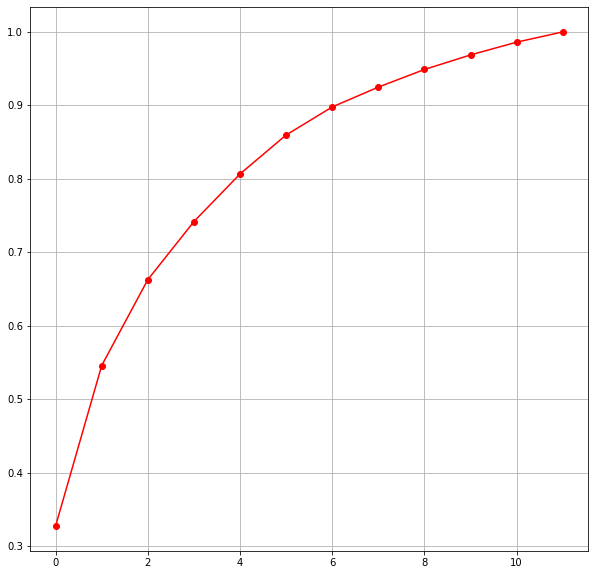

In [58]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=10)
x_new = pca_new.fit_transform(scaled_data)

In [59]:
print(x_new)

[[ 3.34585715 -1.5002515   0.13617192 ...  0.14546767  0.73727712
  -1.15890903]
 [ 2.26035037  0.47192698 -1.89785449 ...  0.81449861 -0.55387228
   0.00731134]
 [ 2.28083644 -0.90835486  1.09717455 ... -0.6882     -0.95341444
  -0.28360958]
 ...
 [-2.1040322  -3.00385931 -1.04027222 ... -0.38912697  0.01358742
   0.03379846]
 [-1.80752975 -2.54473185 -0.52746066 ...  0.07799459 -0.00645968
  -0.6333333 ]
 [-2.83057093 -2.80077053  0.7755774  ...  0.19526786  0.74704687
   0.27896701]]


## 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

## a. Finding the optimum number of clusters in K-means model and create the model with the optimum number of clusters found 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17487772.991535854
4399892.504672765
2272085.775664355
1310081.69994258
875357.3858156321
608745.5606447603
380689.26888745796
302601.7844482131
252746.4066243018
210403.69025655882


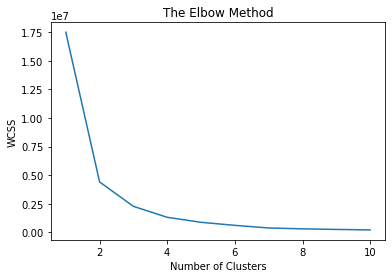

In [28]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(wine)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Here we can see the optimal number of clusters is 3. That is at the ponit of 3 it makes the elbow. So we can set the number of clusters as 3 and apply this in the K means model.

In [56]:
newmodel_kmeans= KMeans(n_clusters =3)
newmodel_kmeans.fit(wine)

KMeans(n_clusters=3)

In [57]:
labels=newmodel_kmeans.predict(wine)
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 2 2 0 2
 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2 2 0 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 2 2 2
 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


You can see the cluster labels from all of your data points. Since we had 3 clusters, we have 3 labels in the output i.e. 0 to 2.

## b. Finding the optimum number of clusters in Agglomerative HC model and create the model with the optimum number of clusters found.

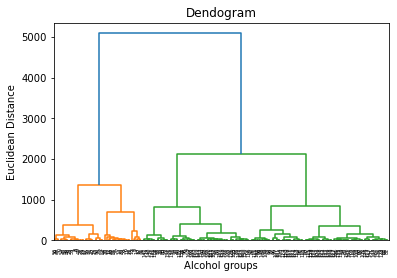

In [32]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(wine,method='ward'))
plt.title("Dendogram")
plt.xlabel("Alcohol groups")
plt.ylabel("Euclidean Distance")
plt.show()

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 3 clusters. Now we know the number of clusters for our dataset, the next step is to group the data points into these 3 clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster library. 

In [45]:
newhc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
newy_hc=newhc.fit_predict(wine)

In [46]:
newy_hc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1],
      dtype=int64)

You can see the cluster labels from all of your data points. Since we had 3 clusters, we have 3 labels in the output i.e. 0 to 2.

## c. Finding the optimum number of clusters in PCA model and create the model with the optimum number of clusters found.

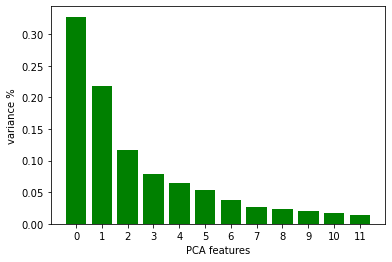

In [63]:
principalComponents = pca.fit_transform(scaled_data)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

The graph shows that the first two components explain the majority of the variance in our data. For this visualization use case, we will quickly plot just the first two. We do this to notice if there are any clear clusters.

Text(0, 0.5, 'PCA 2')

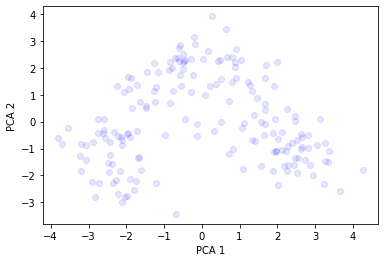

In [62]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

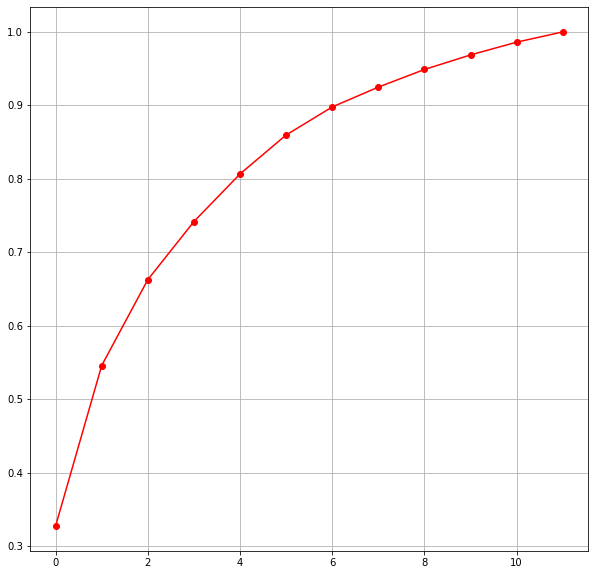

In [64]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [69]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
new_pca = PCA(n_components=8)
new_x = new_pca.fit_transform(scaled_data)

In [70]:
print(x_new)

[[ 3.34585715 -1.5002515   0.13617192 ... -0.21553299  0.76127803
   0.14546767]
 [ 2.26035037  0.47192698 -1.89785449 ... -0.77026861  0.1983761
   0.81449861]
 [ 2.28083644 -0.90835486  1.09717455 ...  0.19015778  0.25191867
  -0.6882    ]
 ...
 [-2.1040322  -3.00385931 -1.04027222 ...  0.2225281   1.0892638
  -0.38912697]
 [-1.80752975 -2.54473185 -0.52746066 ...  0.97547734  1.32227069
   0.07799459]
 [-2.83057093 -2.80077053  0.7755774  ... -0.10273418 -0.43173151
   0.19526786]]


In [74]:
# displaying the PCA components
pca.components_

array([[ 0.19383078, -0.26562928, -0.005488  , -0.30697285,  0.15173718,
         0.4266829 , -0.32936205,  0.3314621 , -0.06780013,  0.31328429,
         0.39827135,  0.33587995],
       [-0.44873968, -0.23089794, -0.32044811, -0.00836734, -0.3803164 ,
        -0.03259751, -0.03836867, -0.02397765, -0.51638102,  0.28965075,
         0.18539519, -0.33150159],
       [-0.21451314,  0.02555426,  0.64514447,  0.55983484,  0.17376999,
         0.16784486,  0.14560145,  0.19670797, -0.17118107,  0.14627002,
         0.21192909, -0.099152  ],
       [-0.03572951,  0.4930321 , -0.19924544,  0.11343102, -0.26764587,
         0.20529297, -0.23534569,  0.534397  ,  0.07846936, -0.40785018,
         0.18200902, -0.20664862],
       [-0.21120893,  0.12305618, -0.01972602, -0.00410301,  0.58309803,
        -0.12348339, -0.64285816, -0.2583801 , -0.20782629, -0.18188353,
         0.02316367, -0.1665945 ],
       [-0.24518354, -0.68482675, -0.07560507,  0.19980474,  0.0420151 ,
         0.03754822, -